In [6]:
import pandas as pd

# 数据加载
data = pd.read_csv('./car_price.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [7]:
# 使用KMeans进行聚类,导入库
from sklearn.cluster import KMeans
#预处理
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
#矩阵运算
import numpy as np

In [8]:
# 建立训练集
train_x = data[["car_ID","symboling","CarName", "fueltype", "aspiration", "doornumber",
                    "carbody", "drivewheel", "enginelocation", "wheelbase", "carlength","carwidth",
                    "carheight", "curbweight", "enginetype", "cylindernumber", "enginesize","fuelsystem",
                    "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm","citympg",
                    "highwaympg", "price"]]
train_x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [9]:
#将非数值字段转化为数值
le = LabelEncoder()
columns = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for column in columns:
    #LabelEncoder().transform将标签转换为归一化的编码。fit_transform安装标签编码器并返回编码的标签。
    train_x[column] = le.fit_transform(train_x[column])
train_x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,9,1,0,1,3,1,0,99.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,5,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,7,1,0,0,4,1,0,105.8,...,136,5,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,6,1,1,0,3,1,0,105.8,...,131,5,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,8,1,1,1,2,0,0,99.5,...,131,5,3.13,3.40,7.00,160,5500,16,22,17859.167


In [10]:
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
#MinMaxScaler()将每个要素缩放到给定范围，拟合数据，然后对其进行转换。
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)

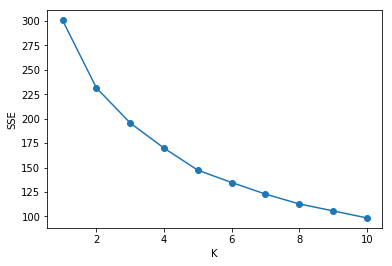

In [15]:
#选择聚类组数
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 11)
#将图像嵌入在结果中
%matplotlib inline
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')

In [16]:

# 使用KMeans聚类,分成4类
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_x)  # 也可以直接fit+predict
#predict计算聚类中心并预测每个样本的聚类索引。
predict_y = kmeans.predict(train_x)
predict_y


array([4, 4, 4, 1, 1, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 0, 0, 1, 0,
       0, 4, 1, 1, 1, 4, 1, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 4, 2, 2, 4, 0, 0, 0, 1, 1, 4, 4, 4, 4, 0, 1, 0, 1, 3, 1, 2,
       3, 3, 3, 3, 3, 2, 4, 2, 4, 4, 0, 0, 0, 4, 4, 0, 4, 4, 4, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 4, 4, 4, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 0, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 4, 1, 4, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1,
       1, 1, 4, 4, 2, 2, 3, 4, 3, 1, 1, 3, 1, 4, 4, 1, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2])

In [17]:
# 合并聚类结果，插入到原数据中,axis： 需要合并链接的轴，0是行，1是列 
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
# 将结果列重命名为'聚类结果'
result.rename({0:u'聚类结果'},axis=1,inplace=True)
result

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,聚类结果
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,4
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,1
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,4
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,2
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,2
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,2
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,4


In [21]:
# 找出vokswagen汽车的聚类结果
label = result[result.CarName.str.contains('vokswagen')]['聚类结果']
label
#练习，多个关键词搜索，join() 方法用于将序列中的元素（必须是str）以指定的字符连接生成一个新的字符串。
List = ['vokswagen','volkswagen']
mask = result.CarName.str.contains('|'.join(List))
selected_data = result[mask]
selected_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,聚类结果
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,idi,3.01,3.4,23.0,52,4800,37,46,7775.0,3
183,184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,7975.0,4
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,idi,3.01,3.4,23.0,52,4800,37,46,7995.0,3
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,8195.0,1
186,187,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,9.0,85,5250,27,34,8495.0,1
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,idi,3.01,3.4,23.0,68,4500,37,42,9495.0,3
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,...,mpfi,3.19,3.4,10.0,100,5500,26,32,9995.0,1
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.19,3.4,8.5,110,5500,19,24,13295.0,1
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,idi,3.01,3.4,23.0,68,4500,33,38,13845.0,3
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,mpfi,3.19,3.4,9.0,88,5500,25,31,12290.0,1


In [30]:
# Vokswagen 轿车 竞品按价格排序
#lambda 是为了减少单行函数的定义而存在的,lambda作为一个表达式，定义了一个匿名函数，上例的代码x为入口参数，x['聚类结果']==3and 'sedan' in x['carbody']为函数体，
#将函数应用到由各列或行形成的一维数组上。DataFrame的apply方法可以实现此功能。默认情况下会以列为单位,axis = 1以行为单位
#[[]]选择多列时用双括号
result[result.apply(lambda x : x['聚类结果'] ==3 and 'sedan' in x['carbody'],axis = 1)][['CarName',"wheelbase", "price",'horsepower','carbody','fueltype','聚类结果']].sort_values('price',ascending = False)

,CarName,wheelbase,price,horsepower,carbody,fueltype,聚类结果
70,buick skyhawk,115.6,31600.0,123,sedan,diesel,3
67,buick electra 225 custom,110.0,25552.0,123,sedan,diesel,3
203,volvo 246,109.1,22470.0,106,sedan,diesel,3
66,mazda rx-7 gs,104.9,18344.0,72,sedan,diesel,3
116,peugeot 504,107.9,17950.0,95,sedan,diesel,3
112,peugeot 604sl,107.9,16900.0,95,sedan,diesel,3
192,volkswagen rabbit custom,100.4,13845.0,68,sedan,diesel,3
108,peugeot 304,107.9,13200.0,95,sedan,diesel,3
63,mazda glc deluxe,98.8,10795.0,64,sedan,diesel,3
174,toyota celica gt,102.4,10698.0,73,sedan,diesel,3


In [31]:
# Vokswagen wagon 竞品按价格排序
result[result.apply(lambda x : x['聚类结果'] ==3 and 'wagon' in x['carbody'],axis =1)][['CarName',"wheelbase", "price",'horsepower','carbody','fueltype','聚类结果']].sort_values('price',ascending = False)

,CarName,wheelbase,price,horsepower,carbody,fueltype,聚类结果
68,buick century luxus (sw),110.0,28248.0,123,wagon,diesel,3
114,peugeot 505s turbo diesel,114.2,17075.0,95,wagon,diesel,3
110,peugeot 504,114.2,13860.0,95,wagon,diesel,3


In [32]:
#显示竞品车总体聚类结果
benchmark = result[result['聚类结果']==3].CarName
print("竞品车如下所示")
print(benchmark)

竞品车如下所示
63              mazda glc deluxe
66                 mazda rx-7 gs
67      buick electra 225 custom
68      buick century luxus (sw)
69                 buick century
70                 buick skyhawk
108                  peugeot 304
110                  peugeot 504
112                peugeot 604sl
114    peugeot 505s turbo diesel
116                  peugeot 504
158                toyota corona
159               toyota corolla
174             toyota celica gt
182             vokswagen rabbit
184         volkswagen model 111
187      volkswagen super beetle
192     volkswagen rabbit custom
203                    volvo 246
Name: CarName, dtype: object
